# ***Vikash Sunil***
## *DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION*
## Task 1: Prediction using Supervised Machine Learning
### Aim: Predict the percentage scored by a student given total study done in hrs/day

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### 1] Loading  & describing the Dataset

In [2]:
# Load the dataset in variable df
df = pd.read_csv("http://bit.ly/w-data")

In [3]:
# Displaying the top 10 data
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Information related to our dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


#### From the information above we can say that there are only 25 rows in the dataset and no null values

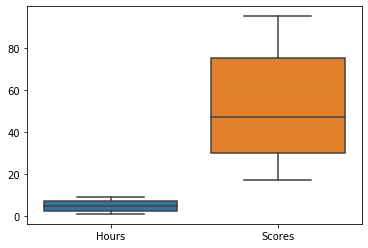

In [6]:
sns.boxplot(data = df[["Hours","Scores"]])

#### From the boxplot, there are no outliers in our data.

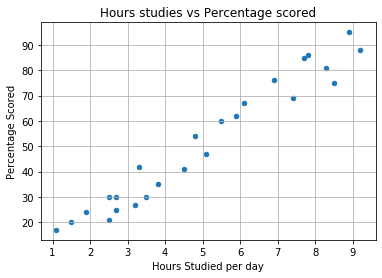

In [7]:
# Plotting the distribution of scores
df.plot.scatter(x = 'Hours', y = 'Scores', grid = True)  
plt.title('Hours studies vs Percentage scored')  
plt.xlabel('Hours Studied per day')  
plt.ylabel('Percentage Scored')  
plt.show()

#### From the above scatter plot we can say that there is a positive linear relation between the number of hours studied and percentage scored by a student.

### 2] Splitting our Dataset into Train and Test

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

In [8]:
X = df.iloc[:, :-1].values # Hours
y = df.iloc[:, 1].values # Scores

Now, split the data into a training set & a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [9]:
from sklearn.model_selection import train_test_split #sklearn model for train & test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

Here I am using 80% of our data(0.8) for training and 20% of the data(0.2) for testing.

### 3] Creating and Training the Model

In [10]:
from sklearn.linear_model import LinearRegression #sklearn library for linear regression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, the training of our model is completed

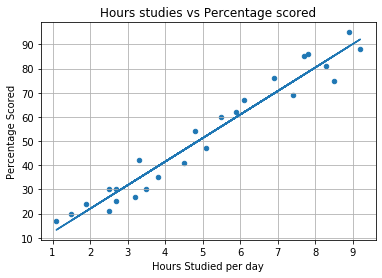

In [11]:
line = lm.coef_*X + lm.intercept_
df.plot.scatter(x="Hours",y="Scores")
plt.title('Hours studies vs Percentage scored')
plt.xlabel('Hours Studied per day')  
plt.ylabel('Percentage Scored')  
plt.plot(X, line)
plt.grid()
plt.show()

Above is the scatter plot with our fitted line

### 4] Predictions from our Model

In [12]:
y_pred = lm.predict(X_test)
predict = pd.DataFrame({"Actual Score":y_test,"Predicted Score":y_pred})
predict

,Actual Score,Predicted Score
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


### 5] Evaluating our Model

Here i will evaluate the performance of my model by calculating Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). 

In [13]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.937597792467705
MSE: 26.675642597052235
RMSE: 5.164846812544612


### 6] Question: Predict the score if a student studies for 9.25 hrs/day

In [14]:
hrs = 9.25
query = np.array([[hrs]])
prediction = lm.predict(query)
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 92.5452195402996
